# IMPORTS

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE , KMeansSMOTE
import lightgbm as lgb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout ,BatchNormalization
from scikeras.wrappers import KerasClassifier
from tensorflow import keras 
from xgboost import XGBClassifier

In [3]:
import tensorflow as tf
print(tf.keras.__version__)

3.13.0


# DATASET LOADING

In [4]:
df = pd.read_csv("DataSet.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# UNDERSTANDING THE DATASET

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df = df.drop('customerID' , axis = 'columns')

df.TotalCharges = pd.to_numeric(df.TotalCharges , errors = 'coerce')
df = df.dropna(subset=['TotalCharges'])


In [7]:
for col in df.columns:
    print(f"unique in {col}: {df[col].unique()}")

unique in gender: ['Female' 'Male']
unique in SeniorCitizen: [0 1]
unique in Partner: ['Yes' 'No']
unique in Dependents: ['No' 'Yes']
unique in tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
unique in PhoneService: ['No' 'Yes']
unique in MultipleLines: ['No phone service' 'No' 'Yes']
unique in InternetService: ['DSL' 'Fiber optic' 'No']
unique in OnlineSecurity: ['No' 'Yes' 'No internet service']
unique in OnlineBackup: ['Yes' 'No' 'No internet service']
unique in DeviceProtection: ['No' 'Yes' 'No internet service']
unique in TechSupport: ['No' 'Yes' 'No internet service']
unique in StreamingTV: ['No' 'Yes' 'No internet service']
unique in StreamingMovies: ['No' 'Yes' 'No internet service']
unique in Contract: ['Month-to-month' 'One year' 'Two year']
unique in PaperlessBilling: ['Yes' 'No']
unique in Payment

In [8]:
df.replace('No internet service' , 'No', inplace = True)
df.replace('No phone service' , 'No', inplace = True)

In [9]:
for col in df.columns:
    print(f"unique in {col}: {df[col].unique()}")

unique in gender: ['Female' 'Male']
unique in SeniorCitizen: [0 1]
unique in Partner: ['Yes' 'No']
unique in Dependents: ['No' 'Yes']
unique in tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
unique in PhoneService: ['No' 'Yes']
unique in MultipleLines: ['No' 'Yes']
unique in InternetService: ['DSL' 'Fiber optic' 'No']
unique in OnlineSecurity: ['No' 'Yes']
unique in OnlineBackup: ['Yes' 'No']
unique in DeviceProtection: ['No' 'Yes']
unique in TechSupport: ['No' 'Yes']
unique in StreamingTV: ['No' 'Yes']
unique in StreamingMovies: ['No' 'Yes']
unique in Contract: ['Month-to-month' 'One year' 'Two year']
unique in PaperlessBilling: ['Yes' 'No']
unique in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
unique in MonthlyCharges: [29.85 56.95 53.85 ... 63.

# SPLITTING THE DATA INTO X AND Y LABELS

In [10]:
y = LabelEncoder().fit_transform(df['Churn'])
X = df.drop(columns=['Churn'])

# DEFINING THE PREPROCESSING PIPELINE

In [33]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('SeniorCitizen')
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# TRAINING THE MODEL WITHOUT HANDLING THE IMBALANCE DATA

In [12]:
pipeline_1 = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', lgb.LGBMClassifier())
])

pipeline_1.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151


,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The g

/Users/saisiddhartha/Desktop/SuperVity/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.79      0.78      1407



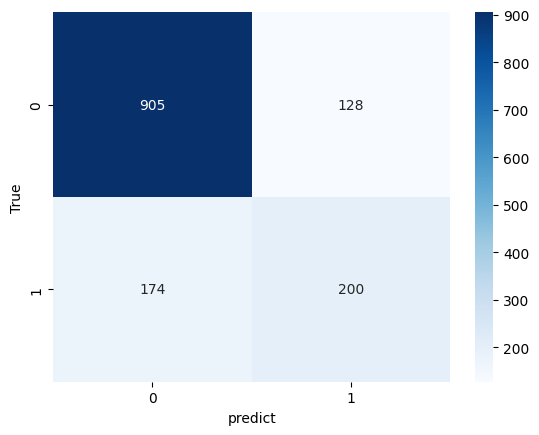

In [13]:
y_pred_1 = pipeline_1.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_1))

cm = confusion_matrix(y_test , y_pred_1)
sn.heatmap(cm,annot = True , fmt = 'd', cmap ='Blues')
plt.xlabel('predict')
plt.ylabel('True')
plt.show()

# TRAINING THE MODEL WHILE HANDLING THE IMBALANCE DATA WITH SMOTE METHOD

In [14]:
pipeline_2 = Pipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', lgb.LGBMClassifier())
])

pipeline_2.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4130, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3206
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The g

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1033
           1       0.59      0.64      0.61       374

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.73      1407
weighted avg       0.79      0.79      0.79      1407



/Users/saisiddhartha/Desktop/SuperVity/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


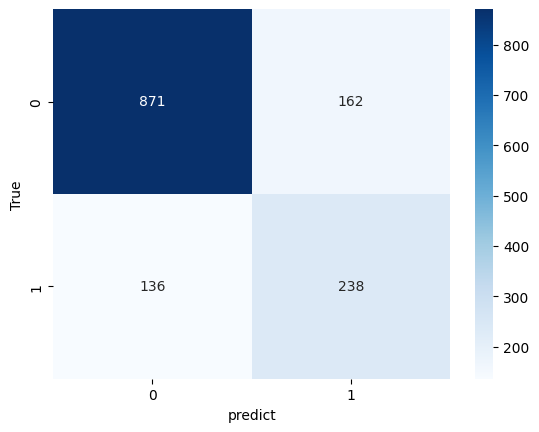

In [15]:
y_pred_2 = pipeline_2.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_2))

cm = confusion_matrix(y_test , y_pred_2)
sn.heatmap(cm,annot = True , fmt = 'd', cmap ='Blues')
plt.xlabel('predict')
plt.ylabel('True')
plt.show()

# TRAINING THE MODEL WITH HANDLING THE DATA USING KMEANS SMOTE

In [36]:
pipeline_3 = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', lgb.LGBMClassifier(class_weight='balanced'))
])


pipeline_3.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string wi

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1033
           1       0.48      0.72      0.58       374

    accuracy                           0.72      1407
   macro avg       0.68      0.72      0.69      1407
weighted avg       0.77      0.72      0.74      1407



/Users/saisiddhartha/Desktop/SuperVity/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


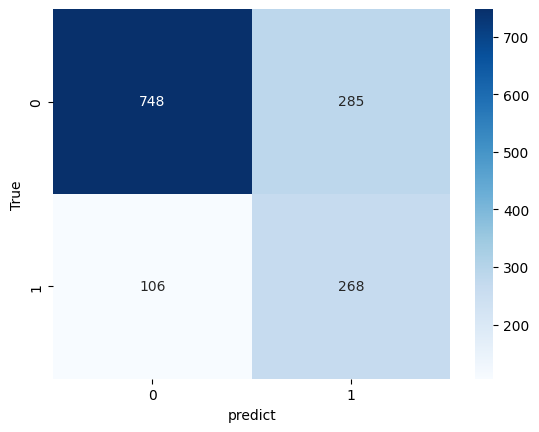

In [37]:
y_pred_3 = pipeline_3.predict(X_test)



print("Classification Report:")
print(classification_report(y_test, y_pred_3))

cm = confusion_matrix(y_test , y_pred_3)
sn.heatmap(cm,annot = True , fmt = 'd', cmap ='Blues')
plt.xlabel('predict')
plt.ylabel('True')
plt.show()

# NOTE
From the results we observed that kmeans smote gives the promissing results

# Using Neural Networks to train the model 

In [18]:
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

def build_nn(meta):
    n_features = meta["n_features_in_"]

    model = Sequential([
    Dense(128, activation="relu", input_shape=(n_features,)),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')
])

    model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[
        Recall(name="recall")
    ])
    return model

nn_clf = KerasClassifier(
    model=build_nn,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

pipeline_nn = Pipeline([
    ("preprocess", preprocessor),
    ("smote", SMOTE(sampling_strategy='minority')),
    ("classifier", nn_clf)
])

pipeline_nn.fit(X_train, y_train)


/Users/saisiddhartha/Desktop/SuperVity/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/saisiddhartha/Desktop/SuperVity/venv/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,recall
  current = self.get_monitor_value(logs)


,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The g

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1033
           1       0.52      0.57      0.54       374

    accuracy                           0.74      1407
   macro avg       0.68      0.69      0.68      1407
weighted avg       0.75      0.74      0.75      1407



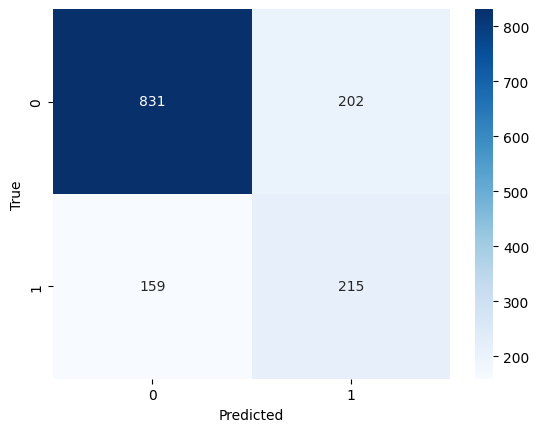

In [19]:
y_pred_nn = pipeline_nn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

cm = confusion_matrix(y_test, y_pred_nn)
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# FINDING THE BEST MODEL

In [20]:
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        class_weight="balanced",
        random_state=42
    ),

    "LightGBM": lgb.LGBMClassifier(
        objective="binary",
        class_weight="balanced",
        random_state=42
    ),

    "XGBoost": XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42,
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6
    )
}


In [21]:
from sklearn.metrics import recall_score


results = {}
trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ('smote', KMeansSMOTE(random_state=42)),
        ("model", model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    recall = recall_score(y_test, y_pred)

    results[name] = recall
    trained_models[name] = pipeline

    print(f"Recall: {recall:.4f}")



Training Random Forest...
Recall: 0.5401

Training LightGBM...
[LightGBM] [Info] Number of positive: 4131, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2189
[LightGBM] [Info] Number of data points in the train set: 8261, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/Users/saisiddhartha/Desktop/SuperVity/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Recall: 0.6043

Training XGBoost...
Recall: 0.6070


In [22]:
best_model_name = max(results, key=results.get)
best_model = trained_models[best_model_name]

print("\nBest Model Selected:")
print(best_model_name)
print("Recall Score:", results[best_model_name])



Best Model Selected:
XGBoost
Recall Score: 0.606951871657754


# Note
Both LightGBM and XGBoost achieved the best performance 

In [23]:
test_model  = lgb.LGBMClassifier()
test_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [24]:
final_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', lgb.LGBMClassifier(class_weight='balanced'))
])

In [32]:
random_param_grid = {
    "classifier__n_estimators": [100, 200, 300, 500],
    "classifier__learning_rate": [0.01, 0.03, 0.05, 0.1],
    "classifier__num_leaves": [20, 31, 50, 70, 100],
    "classifier__max_depth": [-1, 10, 20, 30],
    "classifier__min_child_samples": [10, 20, 40, 60],
    "classifier__subsample": [0.7, 0.8, 0.9, 1.0],
    "classifier__colsample_bytree": [0.7, 0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=final_pipeline,
    param_distributions=random_param_grid,
    n_iter=30,
    scoring="accuracy",
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

random_search.fit(X_train, y_train)

print("Best Recall (Random Search):", random_search.best_score_)
print("Best Params (Random Search):")
print(random_search.best_params_)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Recall (Random Searc

In [30]:
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



/Users/saisiddhartha/Desktop/SuperVity/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# Saving the Best Model

In [28]:
import joblib
best_model = grid_search.best_estimator_
joblib.dump(best_model, "model.pkl")


['model.pkl']

In [29]:
y

array([0, 0, 1, ..., 0, 1, 0], shape=(7032,))